In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import ImageNormalize, LogStretch
norm = ImageNormalize(stretch=LogStretch())
# my functions
from asymmetry_utils import calc_shape_asymmetry, create_segmentation, MaskSources, galaxy_cutout
#
import skimage.transform
import numpy as np
from astropy.io import fits
import warnings
from astropy.stats import SigmaClip

number of masked objects is:  2
IC3392
found you:  IC3392


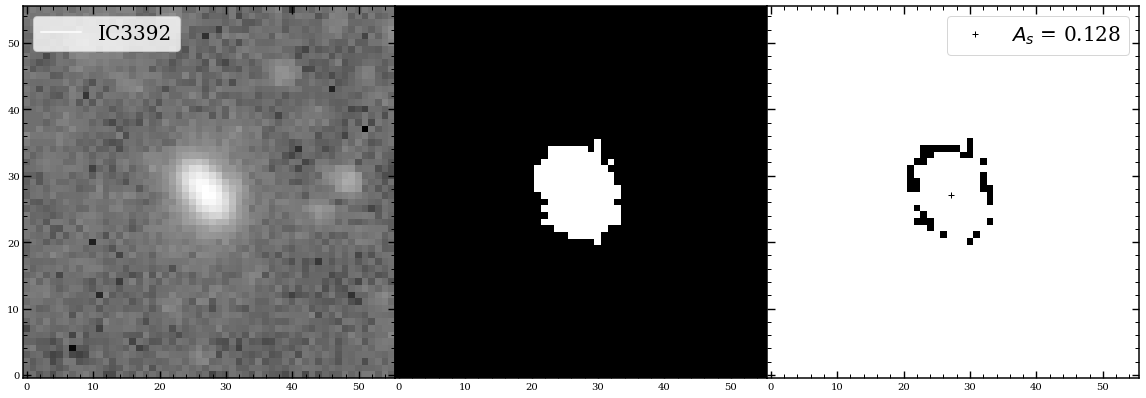

number of masked objects is:  3
NGC4189
found you:  NGC4189


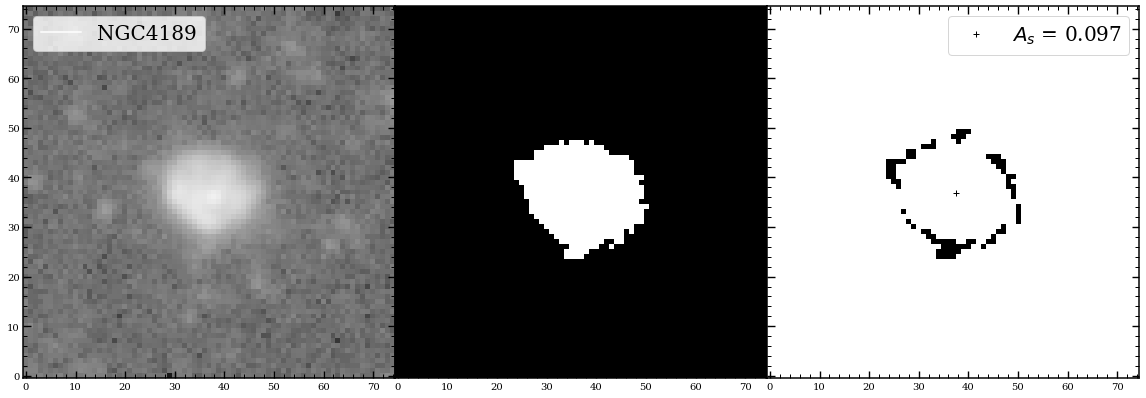

number of masked objects is:  18
NGC4192
found you:  NGC4192


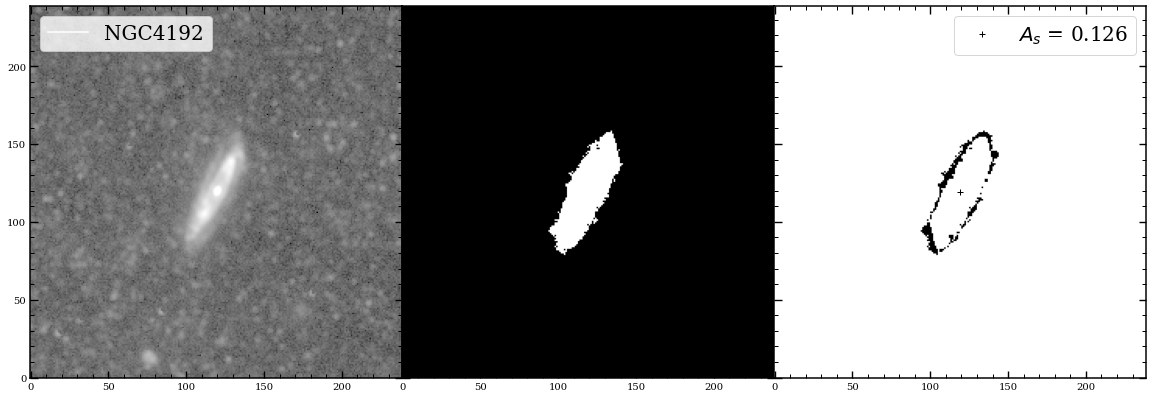

number of masked objects is:  12
NGC4216
found you:  NGC4216


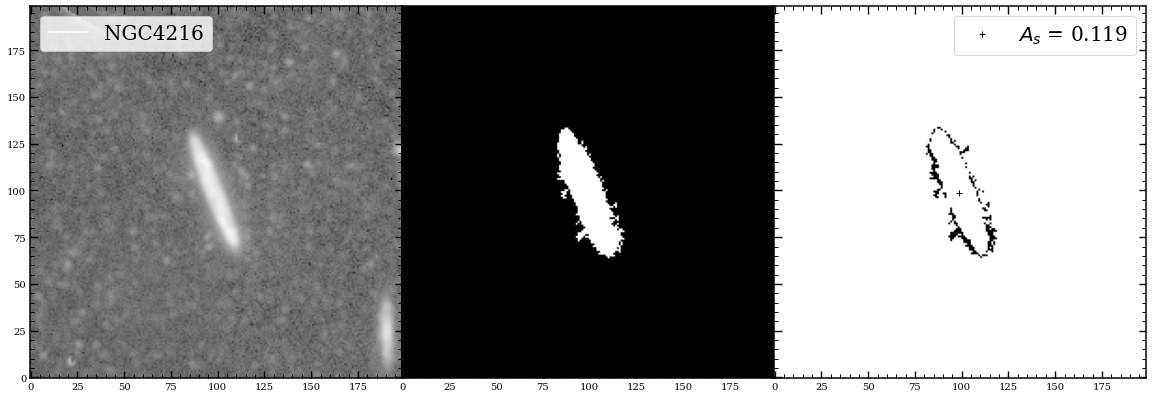

number of masked objects is:  1
NGC4222
found you:  NGC4222


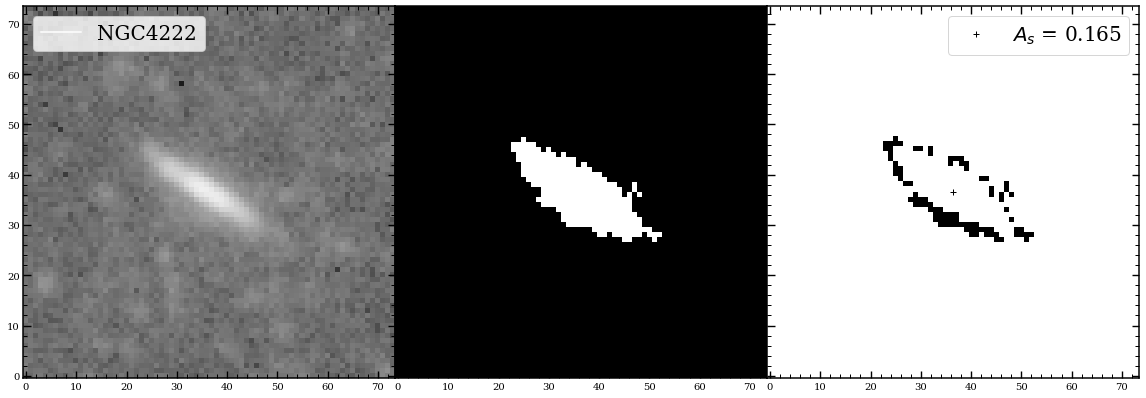

number of masked objects is:  3
NGC4254
found you:  NGC4254


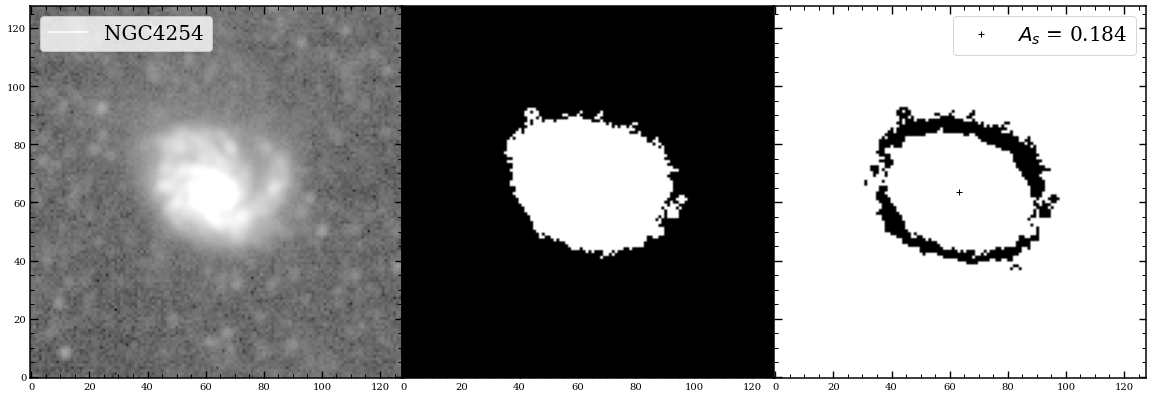

number of masked objects is:  4
NGC4294
found you:  NGC4294


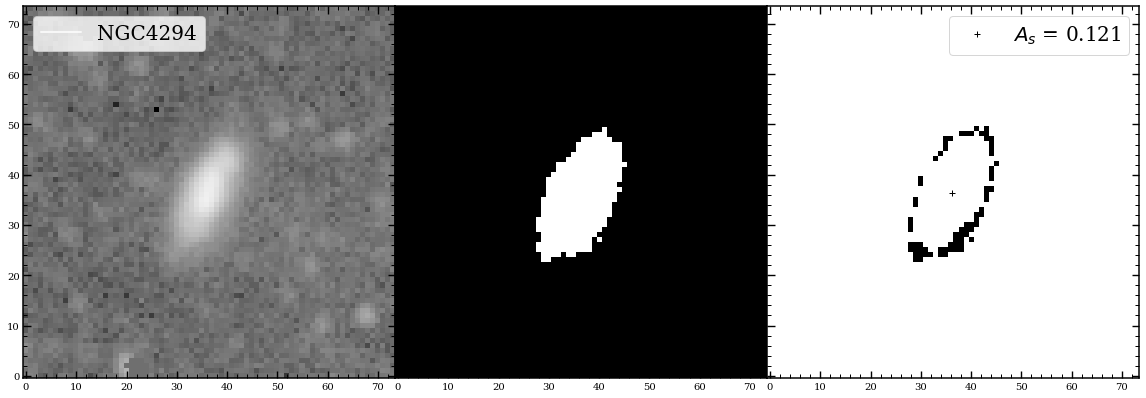

number of masked objects is:  2
NGC4298
found you:  NGC4298


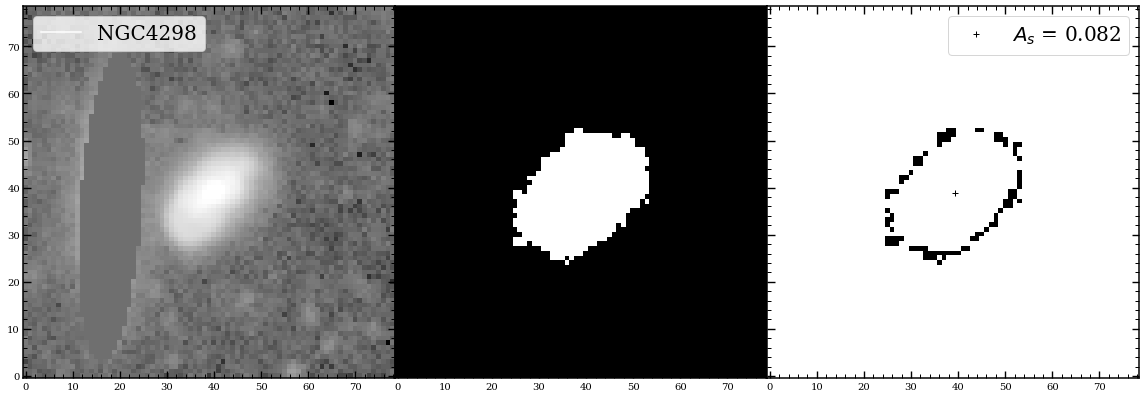

number of masked objects is:  1
NGC4299
found you:  NGC4299


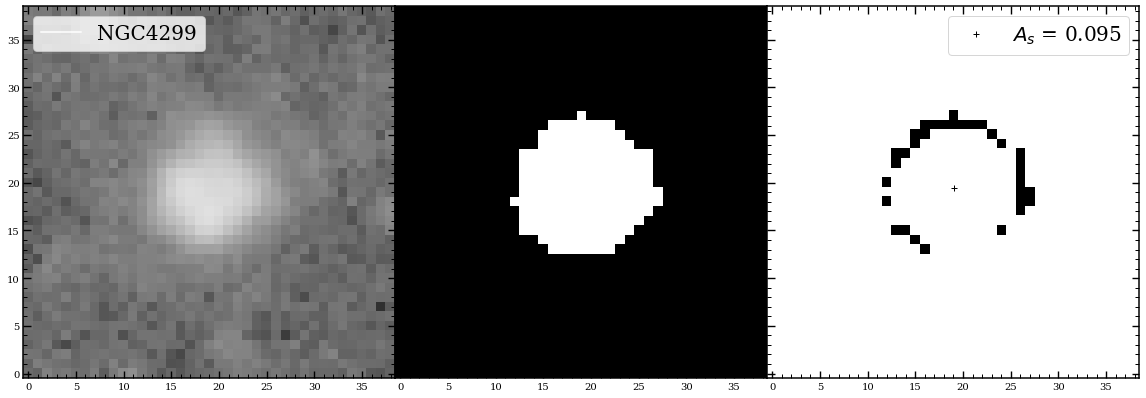

number of masked objects is:  4
NGC4302
found you:  NGC4302


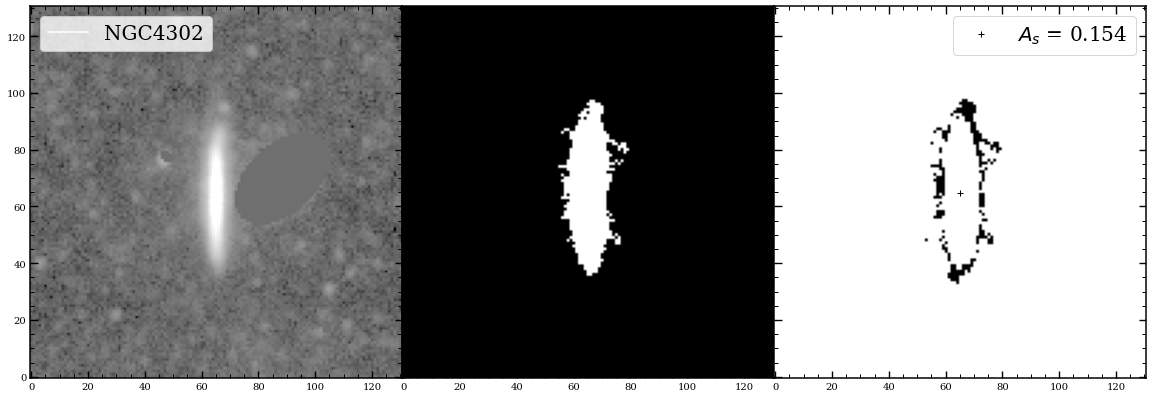

number of masked objects is:  1
NGC4330
found you:  NGC4330


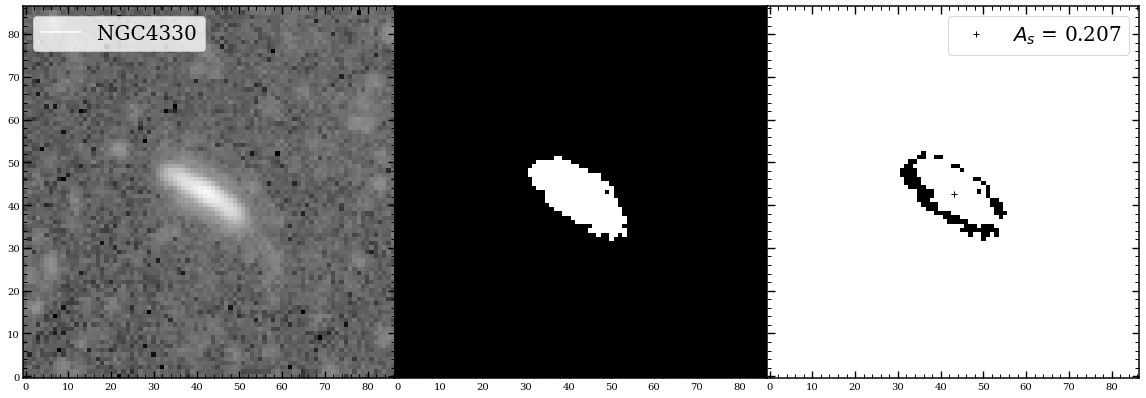

number of masked objects is:  1
NGC4351
found you:  NGC4351


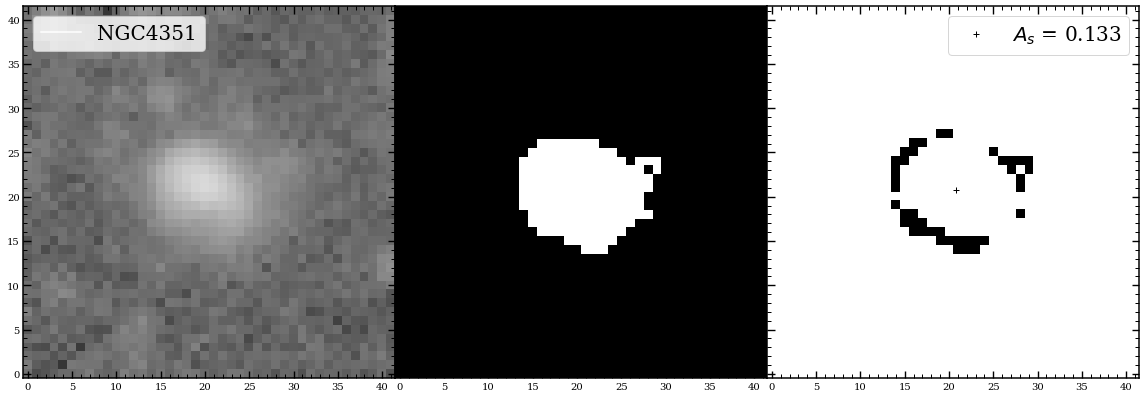

number of masked objects is:  1
NGC4380
found you:  NGC4380


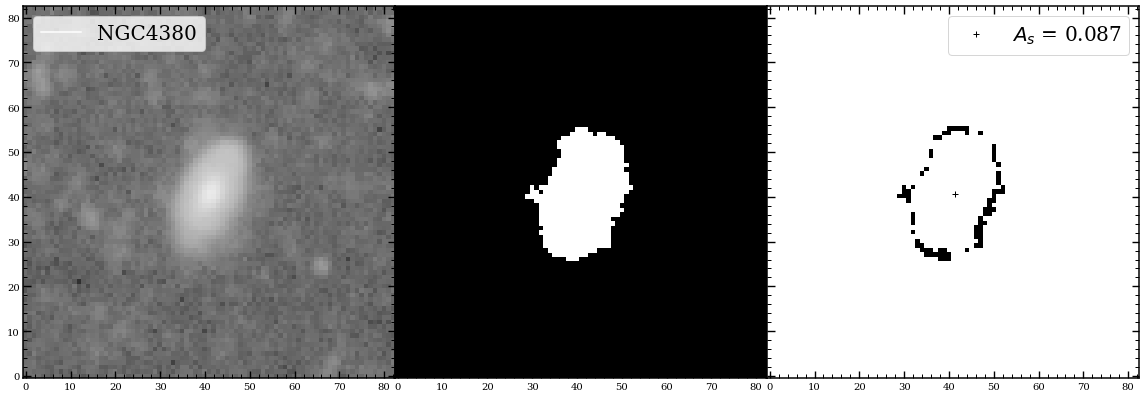

number of masked objects is:  2
NGC4383
found you:  NGC4383


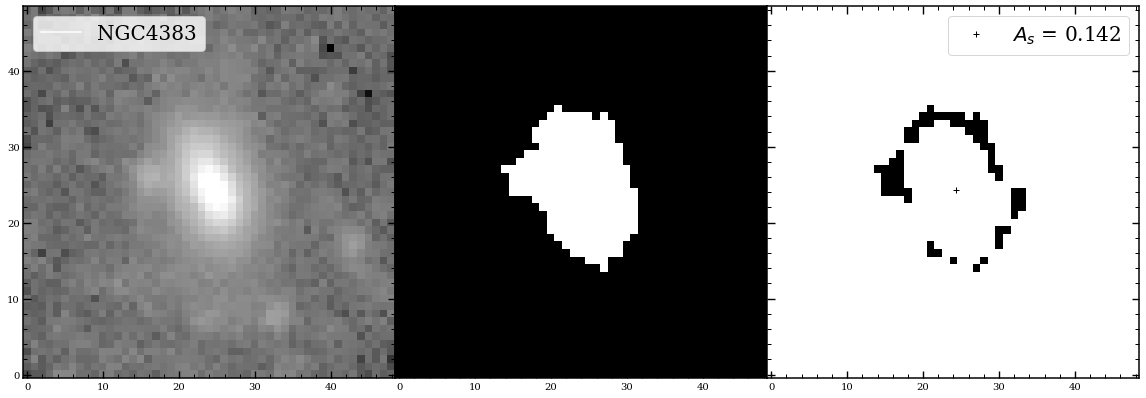

number of masked objects is:  9
NGC4388
found you:  NGC4388


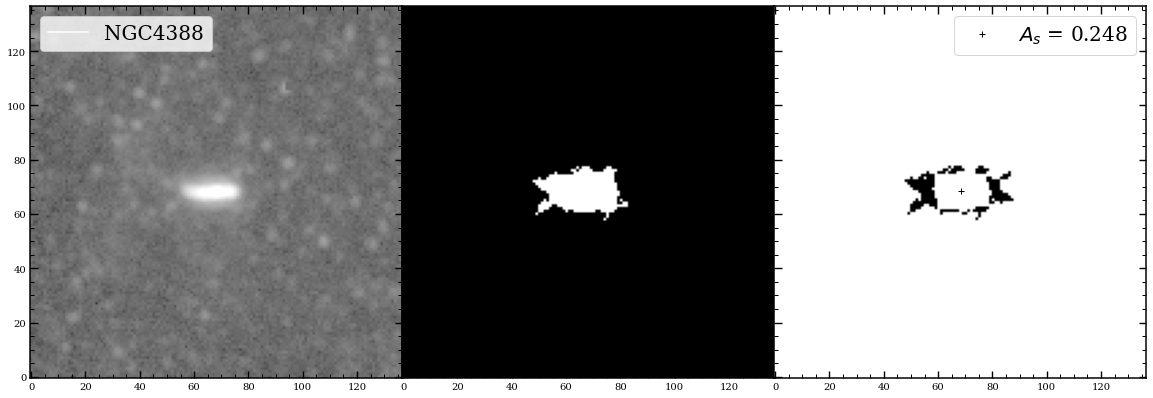

number of masked objects is:  1
NGC4396
found you:  NGC4396


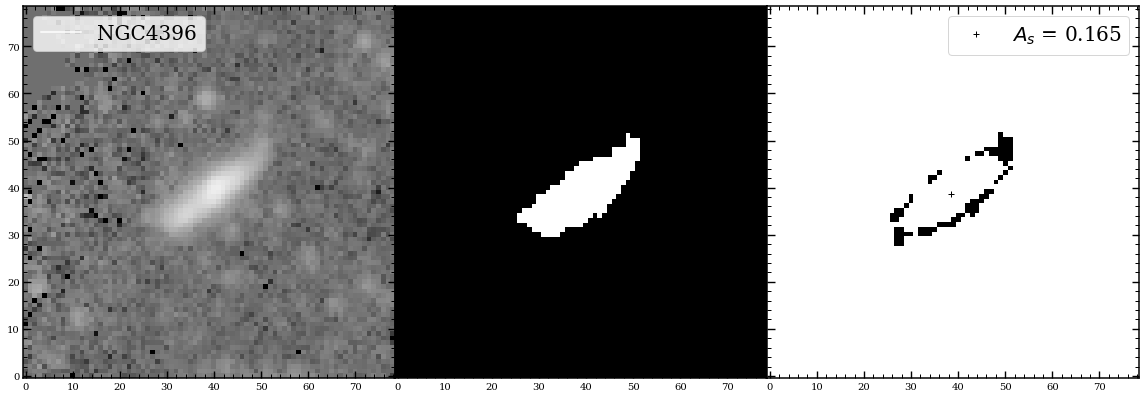

number of masked objects is:  2
NGC4402
found you:  NGC4402


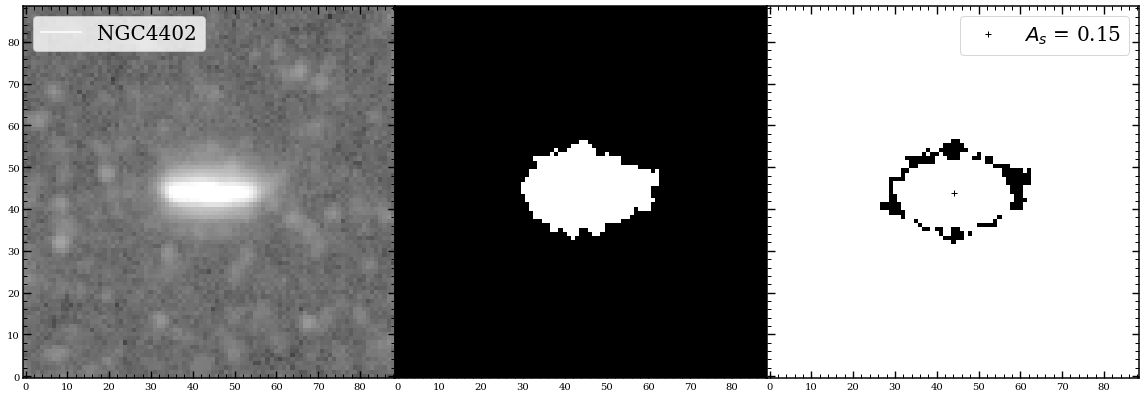

number of masked objects is:  1
NGC4419
found you:  NGC4419


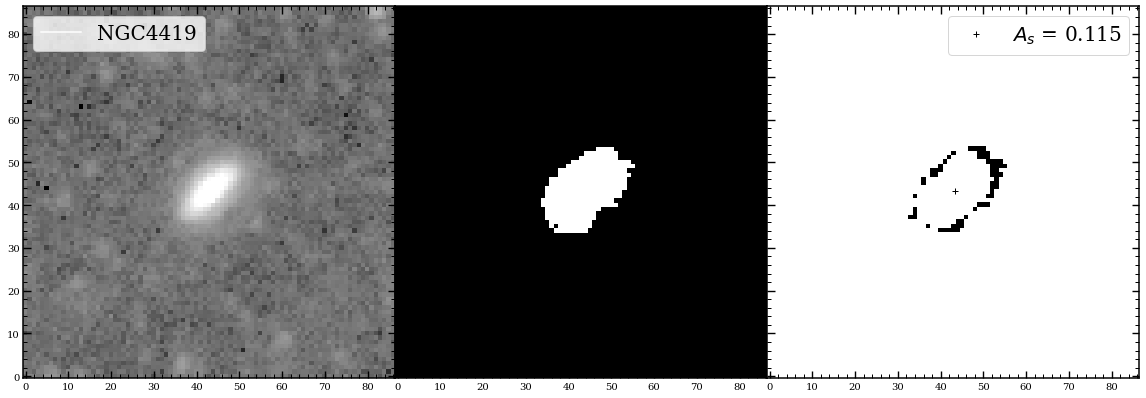

number of masked objects is:  2
NGC4424
found you:  NGC4424


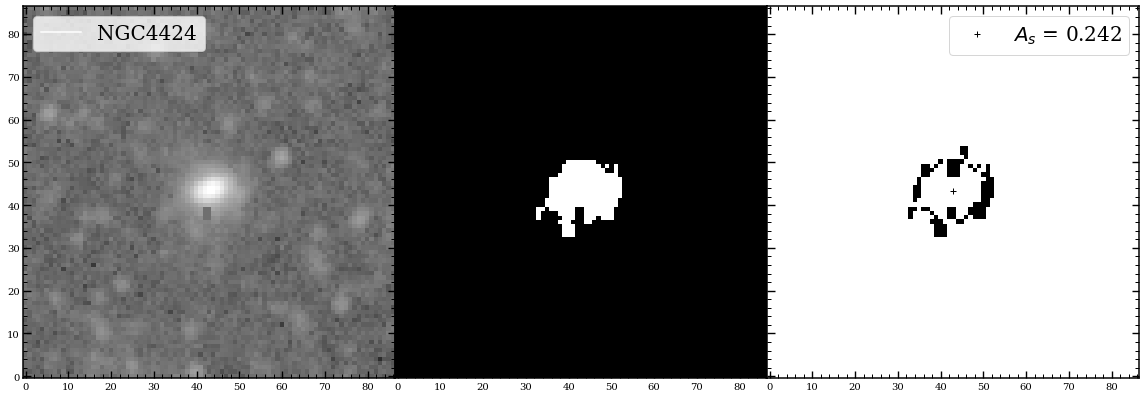

number of masked objects is:  2
NGC4450
found you:  NGC4450


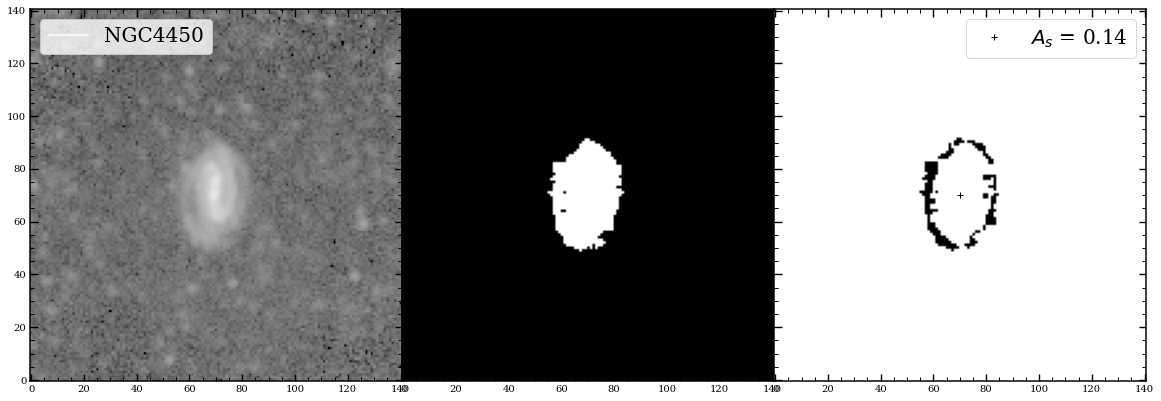

number of masked objects is:  1
NGC4457
found you:  NGC4457


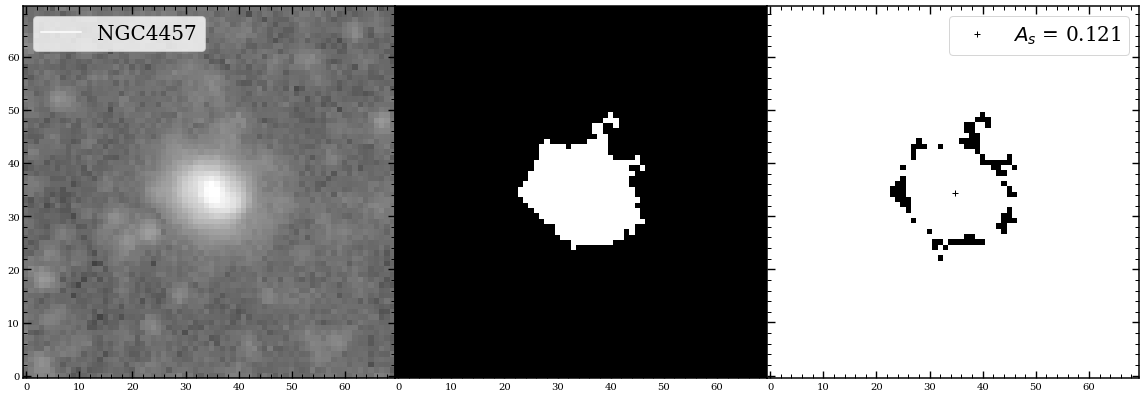

number of masked objects is:  8
NGC4501
found you:  NGC4501


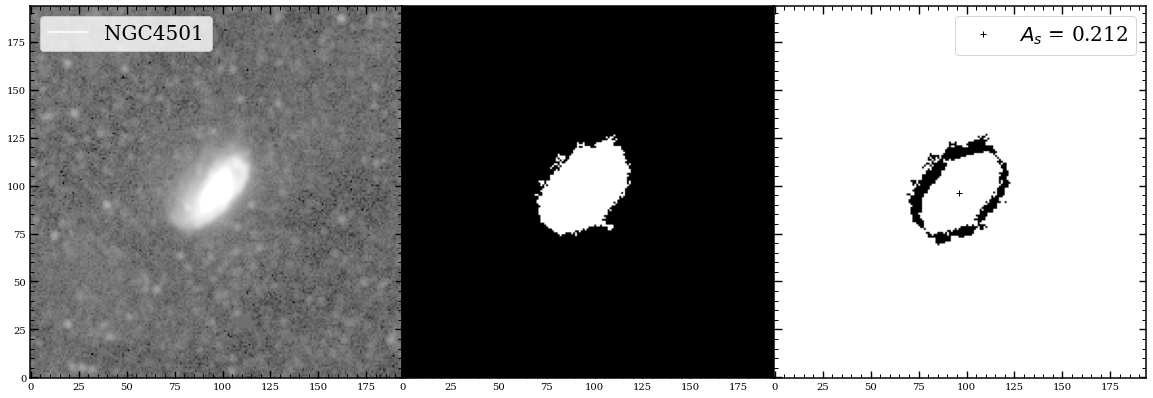

number of masked objects is:  1
NGC4522
found you:  NGC4522


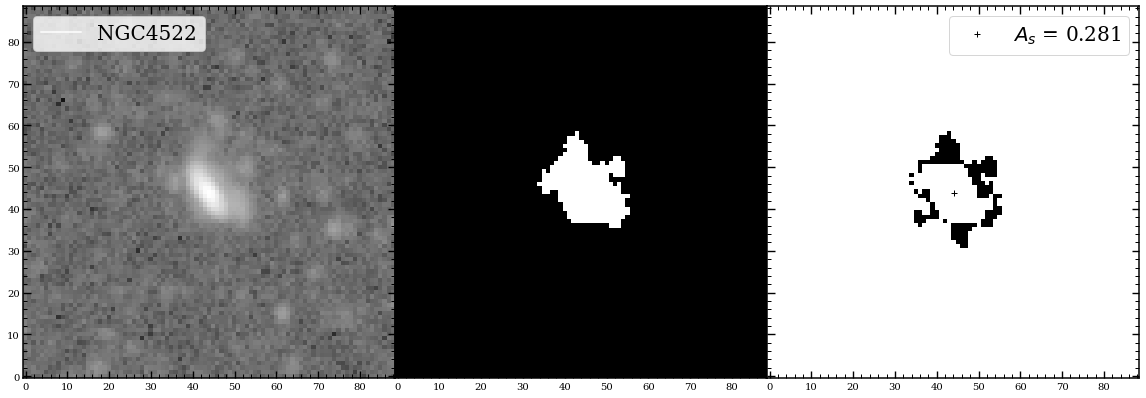

number of masked objects is:  4
NGC4532
found you:  NGC4532


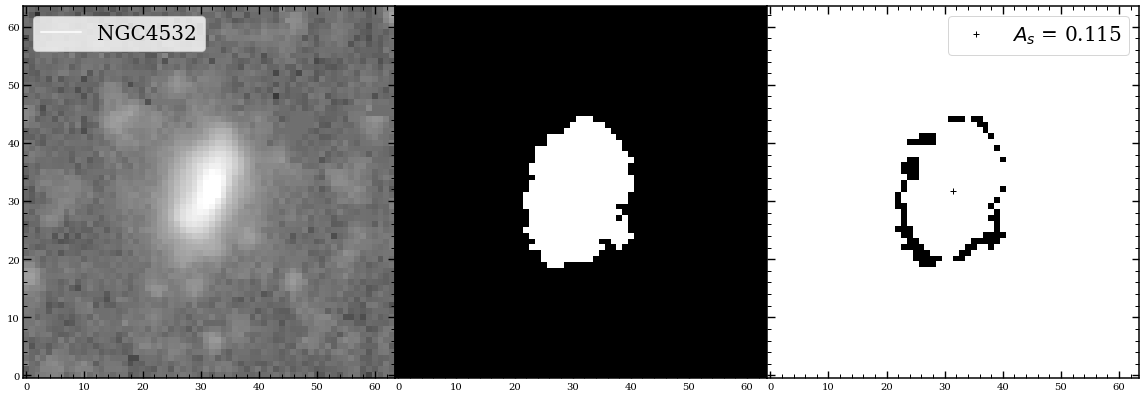

number of masked objects is:  3
NGC4533
found you:  NGC4533


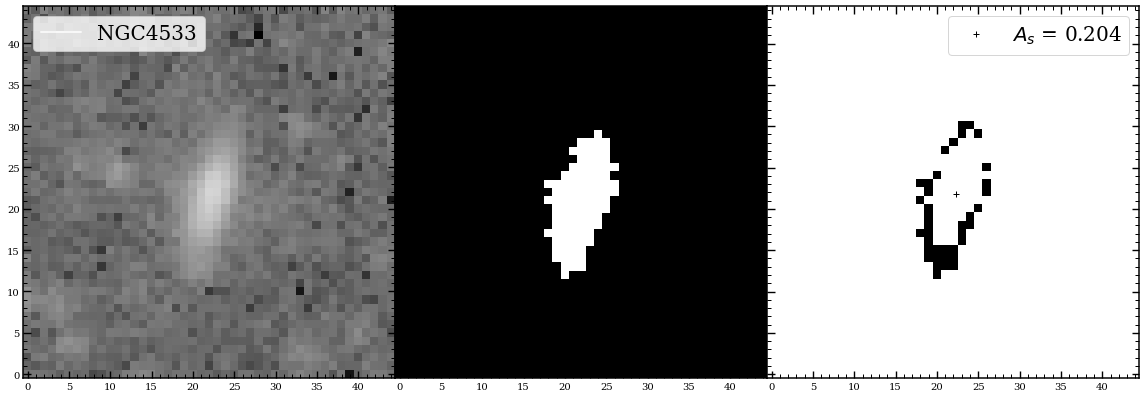

number of masked objects is:  6
NGC4535
found you:  NGC4535


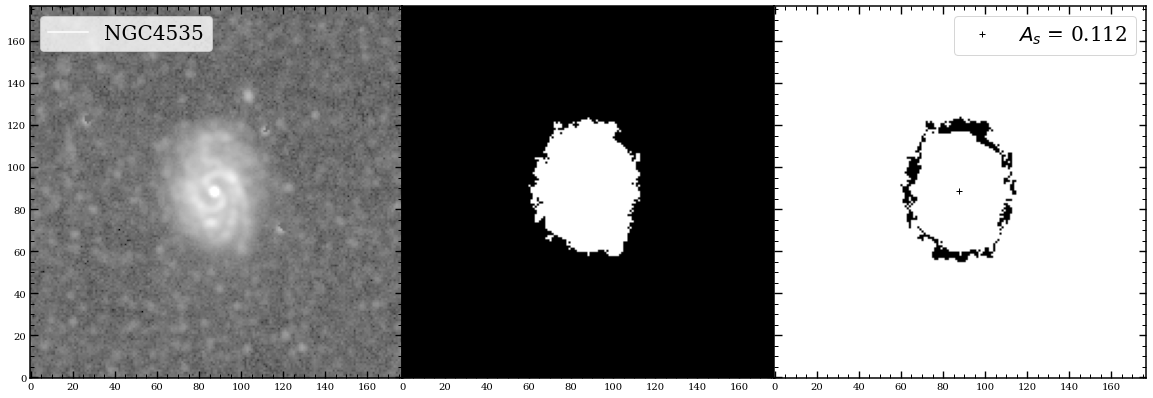

number of masked objects is:  9
NGC4536
found you:  NGC4536


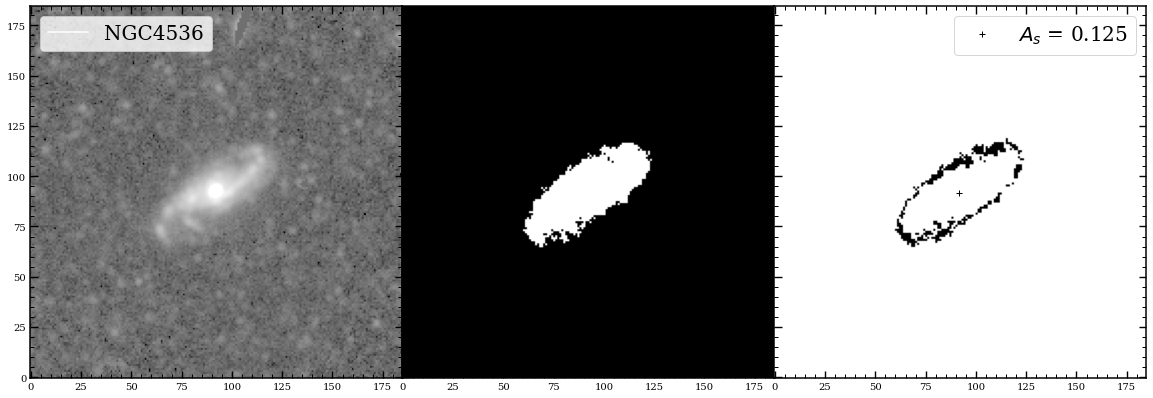

number of masked objects is:  2
NGC4561
found you:  NGC4561


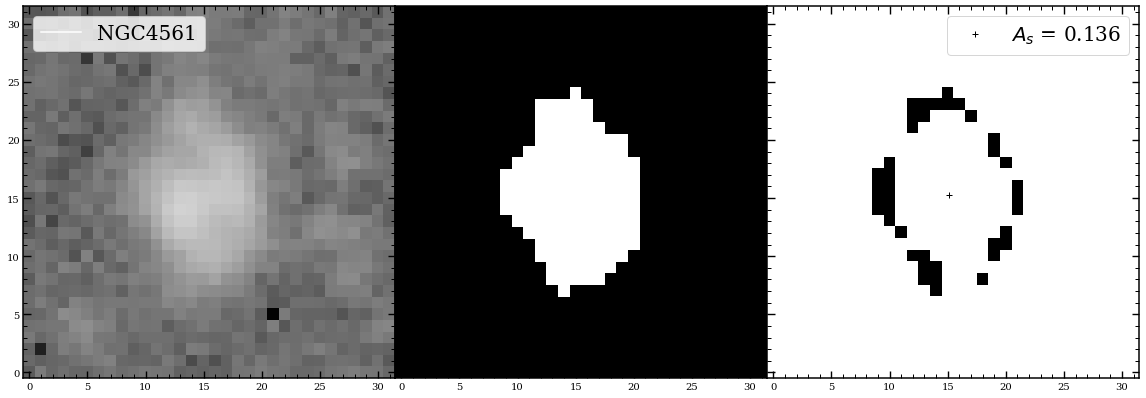

number of masked objects is:  12
NGC4569
found you:  NGC4569


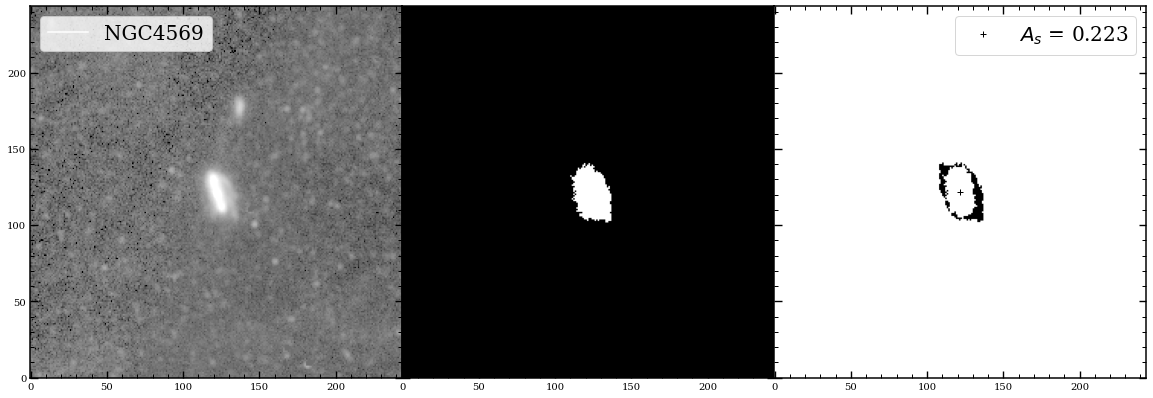

number of masked objects is:  2
NGC4579
found you:  NGC4579


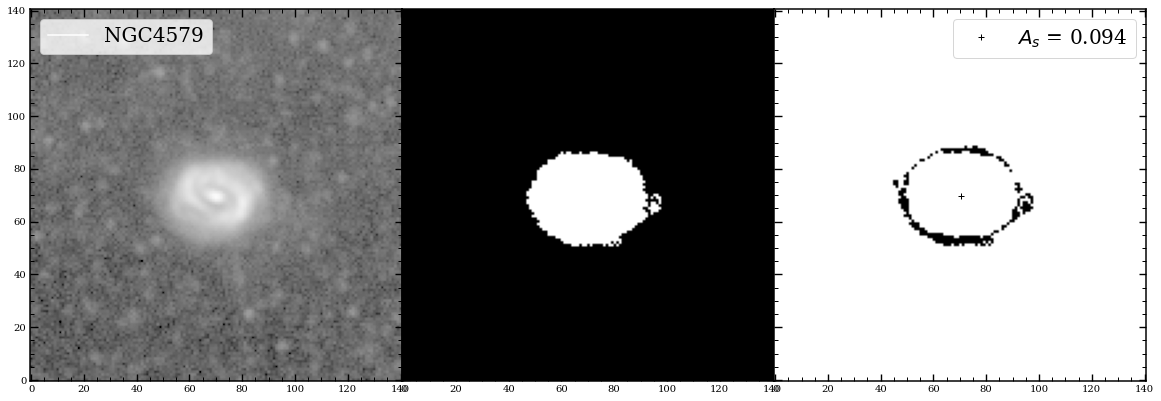

number of masked objects is:  1
NGC4580
found you:  NGC4580


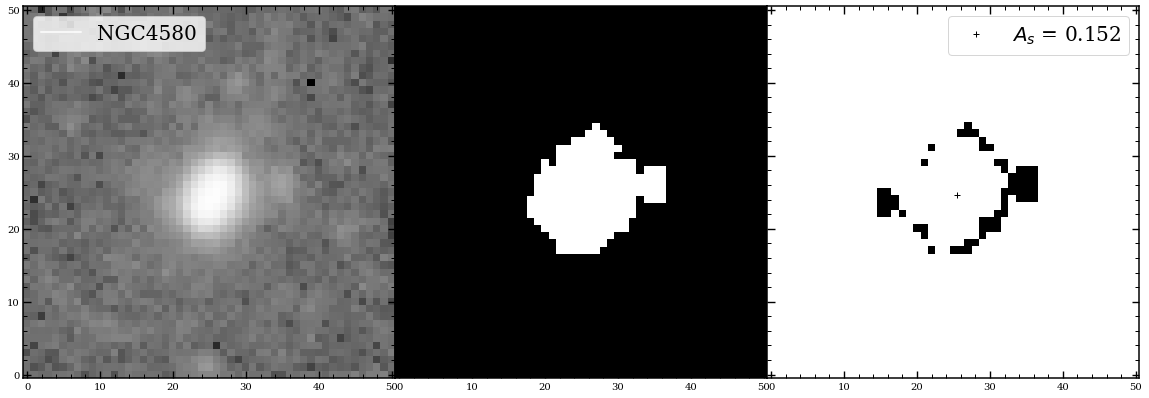

number of masked objects is:  2
NGC4606
found you:  NGC4606


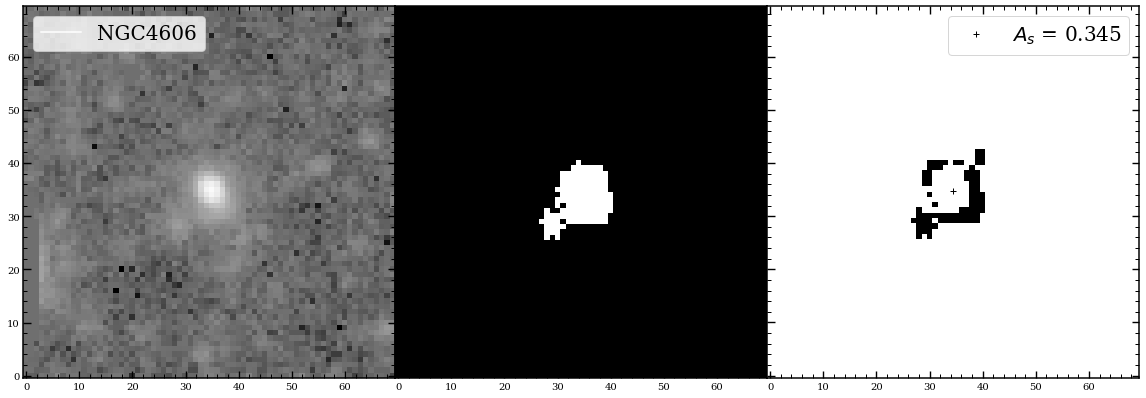

number of masked objects is:  1
NGC4607
found you:  NGC4607


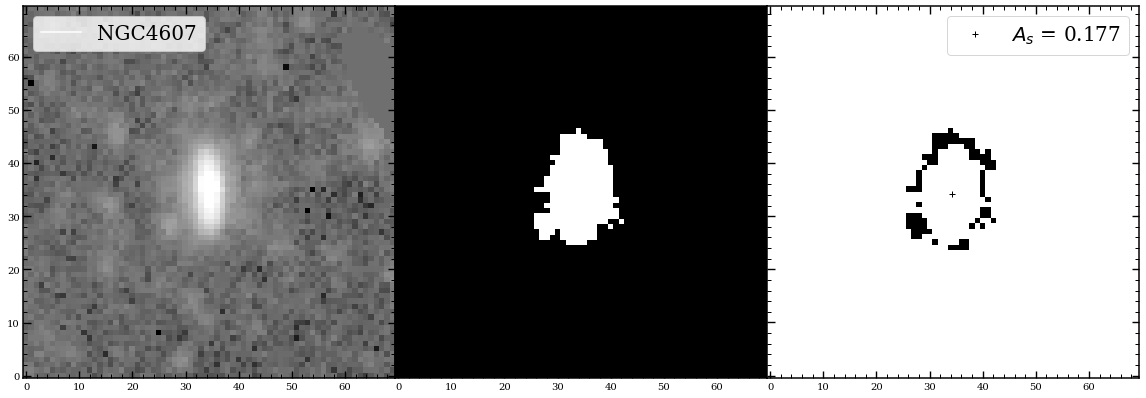

number of masked objects is:  2
NGC4651
found you:  NGC4651


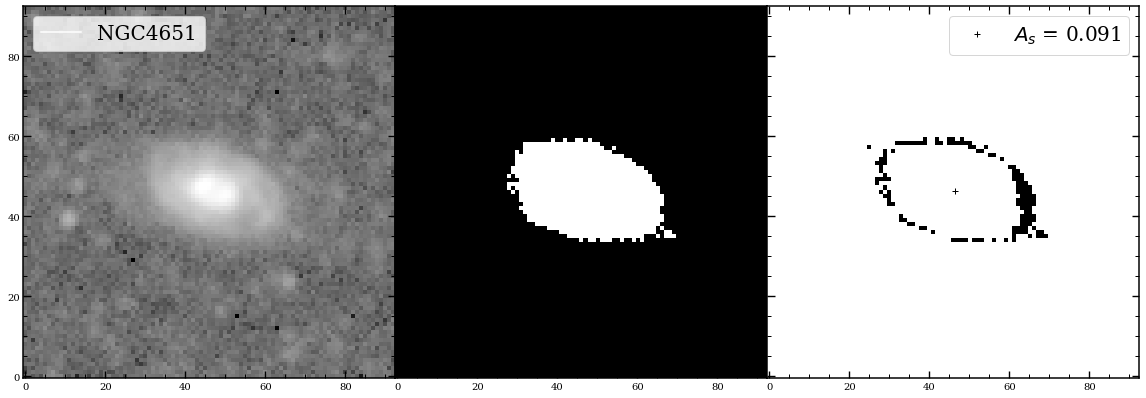

number of masked objects is:  2
NGC4654
found you:  NGC4654


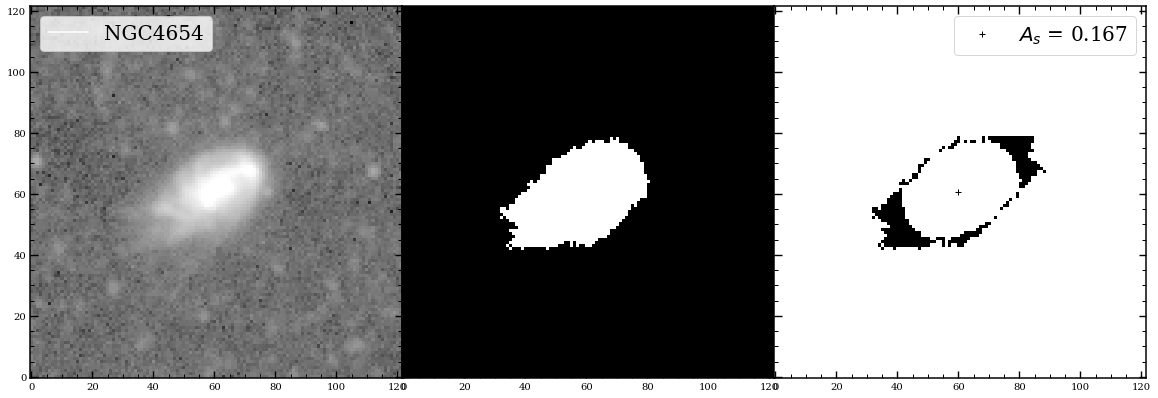

number of masked objects is:  2
NGC4689
found you:  NGC4689


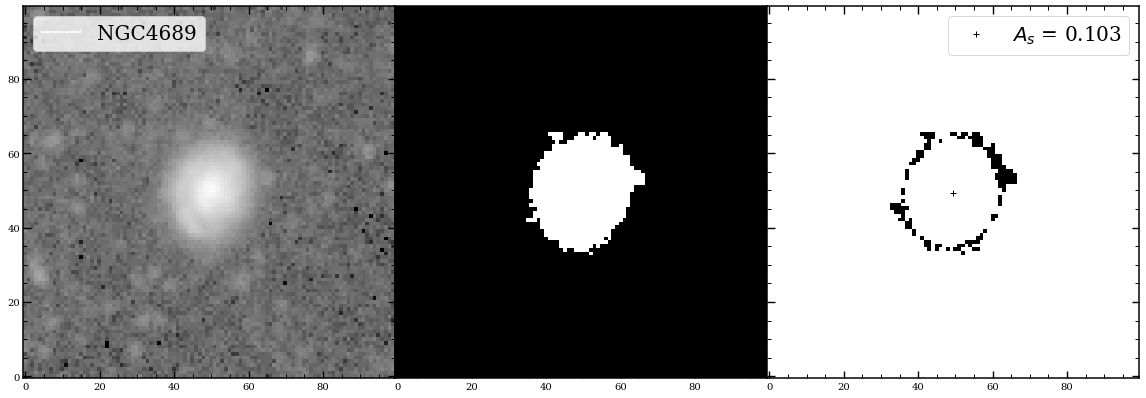

number of masked objects is:  2
NGC4698
found you:  NGC4698


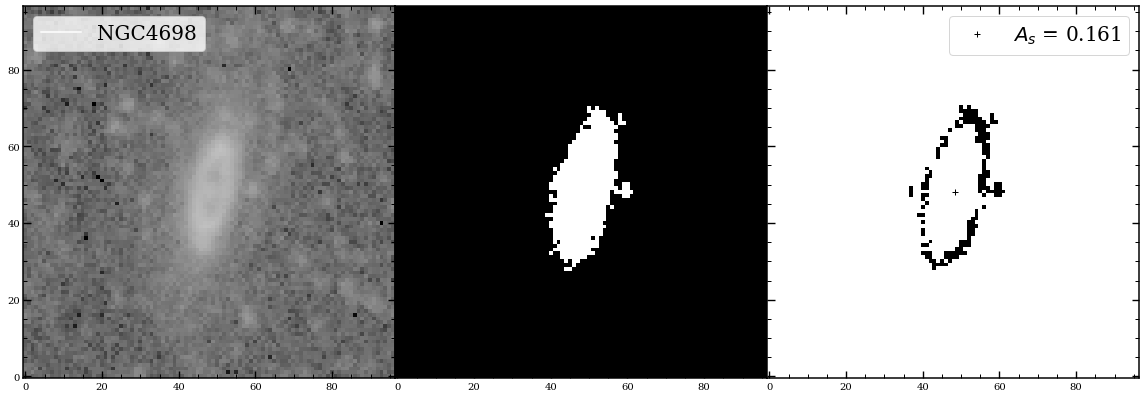

number of masked objects is:  1
NGC4713
found you:  NGC4713


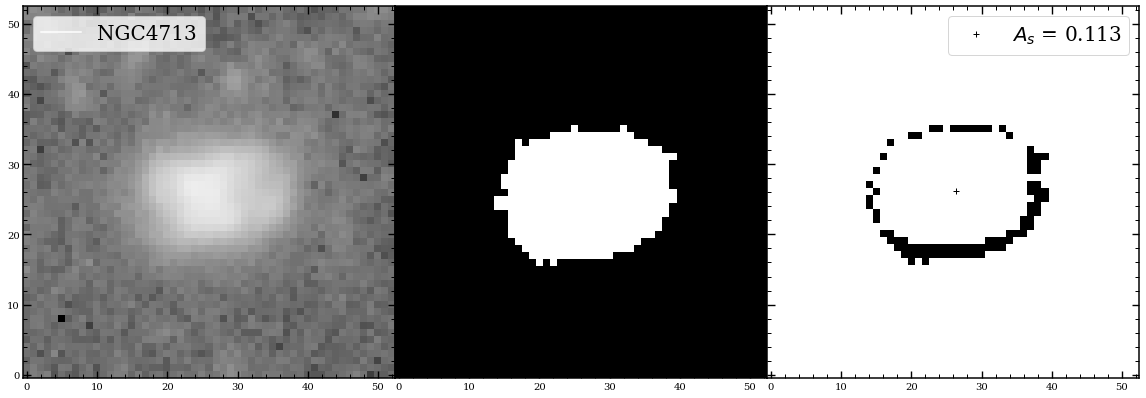

number of masked objects is:  1
NGC4772
found you:  NGC4772


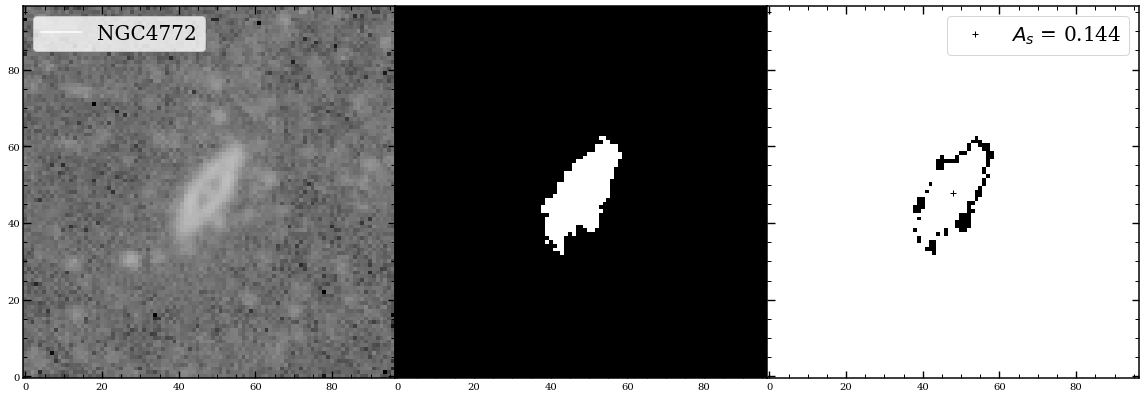

number of masked objects is:  2
NGC4808
found you:  NGC4808


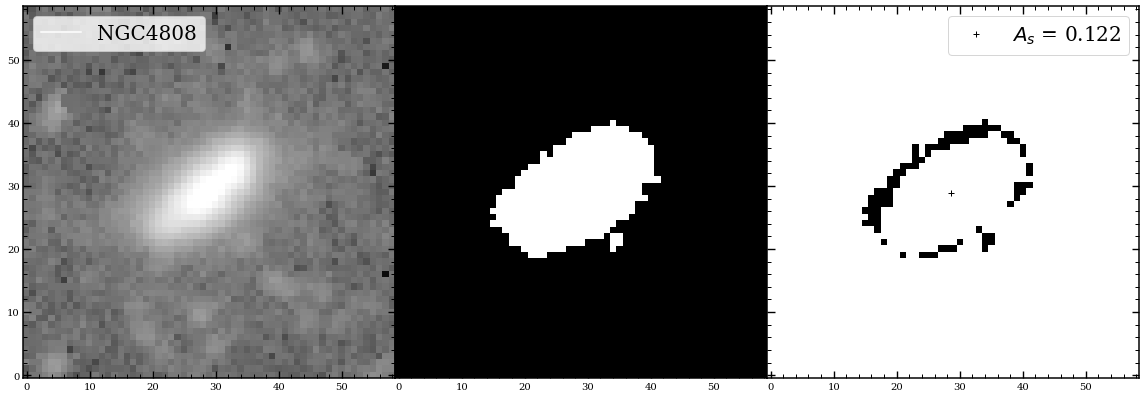

In [2]:
## you will need to change the path to wherever you clone the respository.
## For this example we work in /Users/username/...

username = 'prometheus'

## load galaxy names
names = np.loadtxt('/Users/'+username+'/asymmetry-and-machine-learning/sample_data/galaxies.txt', delimiter="\n", skiprows=0, dtype=np.str_).tolist()

## path to our vertico table
path = '/Users/'+username+'/asymmetry-and-machine-learning/sample_data/vertico_table1.fits'

table = fits.open(path)[1].data

As = np.zeros(len(names))

for i in range(len(names)):
    
    img = fits.open('/Users/'+username+'/asymmetry-and-machine-learning/sample_data/VERTICO/'+names[i]+'/'+names[i]+'_SPIRE_250_bkgsub.fits')[0]
    
    ## Grab our galaxies properties from the table
    new_tab = table[table['Galaxy'] == names[i]][0]
    
    ra, dec, inclination, pa = new_tab['RA'], new_tab['DEC'], new_tab['inclination'], new_tab['pa']
    
    ## Create thumnail
    cutout, centre, radius = galaxy_cutout(img.data, img.header, ra, dec, names[i], size = 5.0, centre_and_radius=True)
    
    ## mask nearby sources in thumbnail
    mask = MaskSources(cutout.data, names[i], path, wcs = cutout.wcs, ps=6).disk_mask
    
    cutout.data *= mask
    
    ## Create segementation map
    segmentation_map = create_segmentation(cutout.data, sigma_clip=SigmaClip(sigma=3.5))
    
    ## Calculate shape asymmetry
    As[i] = calc_shape_asymmetry(segmentation_map, centre, 1.5*radius)

    ## for plotting purposes, rotate segmap
    seg_180 = skimage.transform.rotate(segmentation_map, 180.0, center=centre)
        
    if np.unique(seg_180).shape[0] > 2:
 
        segmap_180 = 1*(seg_180 == seg_180.max())
    
    else:
        
        segmap_180 = seg_180
        
    ## Plot
    fig = plt.figure(figsize = (20,8))
    
    gs = fig.add_gridspec(1, 3, hspace=0, wspace=0)
    
    (ax1, ax2, ax3) = gs.subplots(sharex='col', sharey='row')
    
    cmap = plt.cm.gray
    
    ax1.imshow(cutout.data, norm = norm, cmap = cmap, origin = 'lower')
    
    ## add galaxy name to this one
    ax1.plot(0, 0, color = cmap(256), label=names[i])
    
    ax1.legend(loc = 'upper left', fontsize = 20)
    
    ax2.imshow(segmentation_map, origin = 'lower', cmap = cmap)
    
    ax3.imshow(np.abs(segmentation_map - segmap_180), cmap = 'gray_r', origin = 'lower')
    
    ax3.plot(centre[0], centre[1], 'k+', label = '$A_s$ = '+str(round(As[i],3)))
    
    ax3.legend(loc = 0, fontsize = 20)
    
    ## If you would like to save all files, uncomment the following line and run this command. We can then merge to one.
    
    #plt.savefig('/path_to_some_folder/segmap_'+str(i)+'.pdf')
    
    ## This assumes you use some folder you are saving the files to
    
    plt.show()
    
    

In [3]:
## If you saved your files independently above, you can run the following..
## As above, I assume you saved the above plots individually to some directory 'path_to_some_folder'

## Required package
from PyPDF2 import PdfFileMerger, PdfFileReader
 
## Call the PdfFileMerger
mergedObject = PdfFileMerger()
 
## Loop through all of them and append their pages
for i in range(len(names)):
    mergedObject.append(PdfFileReader(path_to_some_folder+'/segmap_'+str(i)+'.pdf'))

##Write all the files into a file which is named as shown below
mergedObject.write(path_to_some_folder+'/segmaps_250_microns.pdf')


In [ ]:
# The same can now be done for other wavelengths if needed. 